# Using Historical Data to Predict Batting Success: Step 5 of 5

Authored by: Donna J. Harris (994042890)

Email: harr2890@mylaurier.ca

For: CP640 Machine Learning (S22) with Professor Elham Harirpoush

## Notebook Series

Just a word about the presentation of this project code.

The code is organized into a series of locally executed Jupyter notebooks, organized by step and needing to be executed in sequence to follow the flow of the entire project.

This is `harr2890_project_step5_ops_modelling`, the fifth of five notebooks.

## *Step 5 - Exploration and Modelling for an OPS Approach*

Baseball is full of statistics but one of the clearest statistics about a batter's effectiveness at the plate is the OPS, which is the sum of the player's On Base Percentage (an important indication of how often they get on base) and the player's Slugging Percentage (an indicator of the hitting power a player posesses, which can point to their ability to help their on-base teammates to score).

This approach for predicting batting success goes directly to this statistic and aims to explore how past data might have hints about a player's future with respect to the OPS statistic.

Generally speaking, a player with an OPS above 0.7666 is above average, with higher values classifying the player as increasingly excellent.  (Reference: https://en.wikipedia.org/wiki/On-base_plus_slugging)

## Environment Setup

Import and establish environment for our work, including showing all dataframe column values.

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

### Pre-Conditions

Steps 1 and 4 must be run completely before running this notebook.

The `data` folder must exist with the following prepared data file:
- `./data/step4_ops_data.csv`

##  Loading Prepared Data Files

In [2]:
alldata_csv = "./data/step4_ops_data.csv"
all_data = pd.read_csv(alldata_csv)
all_data

,ID,Player,Career OPS,OPS Y1,OPS Y2,OPS Y3,OPS Y4,OPS Y5,OPS Y6,OPS Y7,OPS Y8,OPS Y9,OPS Y10
0,aaronha01,Henry Aaron,0.929429,0.768649,0.906129,0.923178,1.040538,0.931299,1.037084,0.918511,0.974295,1.008048,0.977127
1,abernte02,Ted Abernathy,0.335450,0.339031,0.363636,0.457391,2.000000,1.100000,0.000000,0.377193,0.397436,0.117647,0.150000
2,abreubo01,Bobby Abreu,0.869741,0.564394,0.700912,0.905529,0.995070,0.969996,0.935983,0.934118,0.876571,0.971324,0.879219
3,adairje01,Jerry Adair,0.638451,0.255263,0.704762,1.000000,0.719309,0.732600,0.591781,0.623811,0.653253,0.613976,0.640224
4,adamsbo03,Bobby Adams,0.708052,0.636220,0.758645,0.759981,0.643968,0.774407,0.695128,0.696457,0.696835,0.749402,0.731143
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,zimmery01,Ryan Zimmerman,0.815698,0.988320,0.821639,0.787527,0.774207,0.888227,0.898536,0.797583,0.823843,0.809181,0.790265
2395,ziskri01,Richie Zisk,0.818471,0.835088,0.588452,0.889932,0.861508,0.847909,0.807930,0.868639,0.770440,0.751806,0.804017
2396,zitoba01,Barry Zito,0.248153,0.000000,0.000000,0.000000,0.000000,0.285714,0.000000,0.253528,0.299465,0.299465,0.252262
2397,zobribe01,Ben Zobrist,0.782532,0.571679,0.390652,0.844258,0.947596,0.698729,0.822066,0.848305,0.756337,0.749031,0.808557


### Examining Relationships Between Features

The data used in this approach is much more straightforward than in the Hall of Fame Approach. We're looking at past OPS values to predict future OPS values. But we want to know which ones to pick.

In [3]:
import matplotlib.pyplot as plt

def scatter_plot(feature, target):
    plt.figure(figsize=(10, 8))
    plt.scatter(
        all_data[feature],
        all_data[target],
        c='lightgreen',        
        edgecolors=(0, 0, 0)
    )
    
    plt.xlim(0.0, 5.2)
#     plt.ylim(0.0, 1.4)


    plt.xlabel("{}".format(feature))
    plt.ylabel("{}".format(target))
    plt.show()

First, we'll see what we should use to predict the OPS of a player's sixth season, given they have played five seasons already.

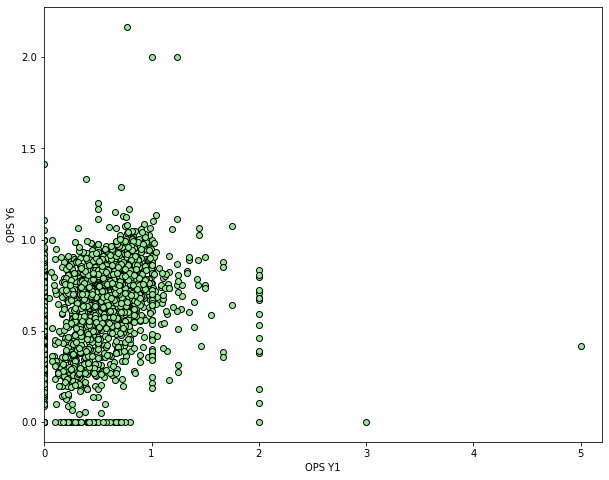

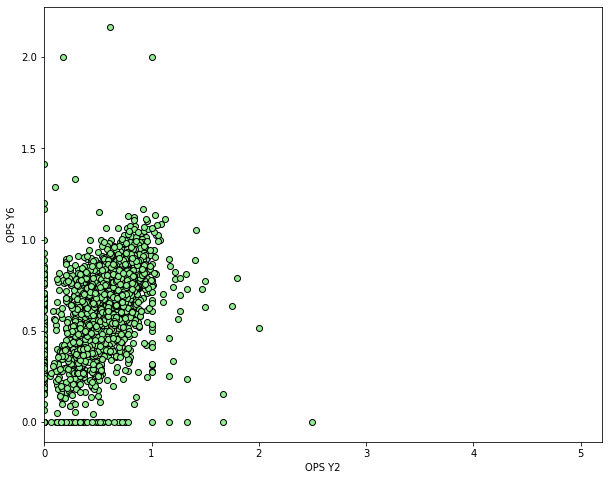

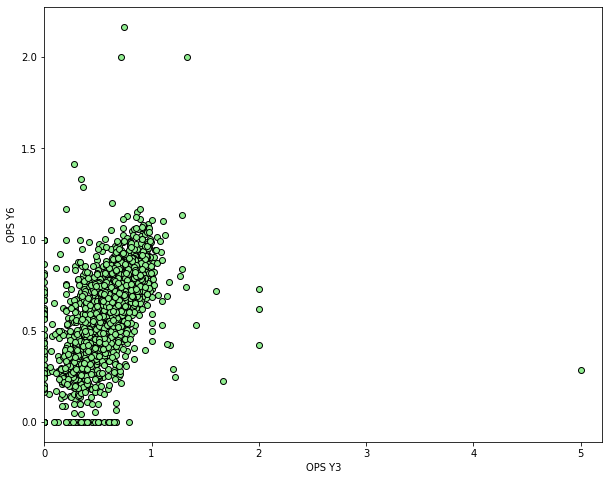

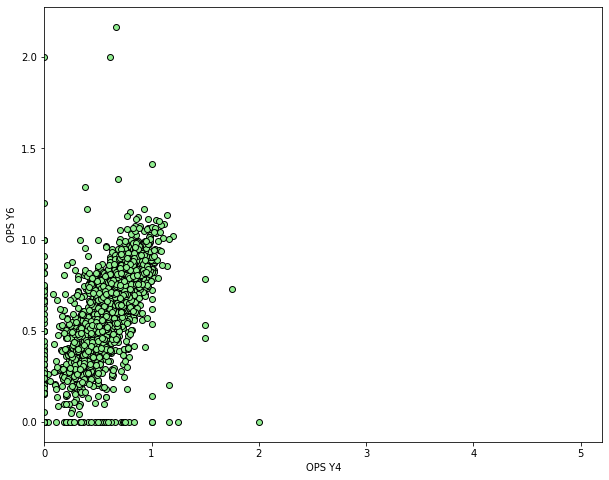

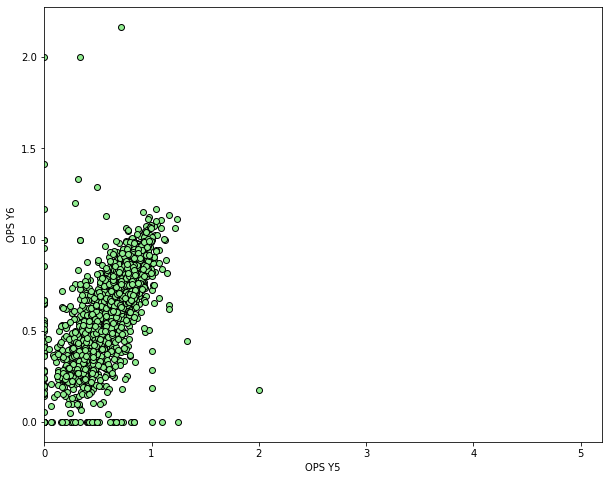

In [4]:
scatter_plot('OPS Y1', 'OPS Y6')
scatter_plot('OPS Y2', 'OPS Y6')
scatter_plot('OPS Y3', 'OPS Y6')
scatter_plot('OPS Y4', 'OPS Y6')
scatter_plot('OPS Y5', 'OPS Y6')

We can see there is a tighter line forming the closer we get to the sixth year. In particular, years three through five are of interest.

Next we'll look at the first five seasons with respect to the tenth season's OPS.

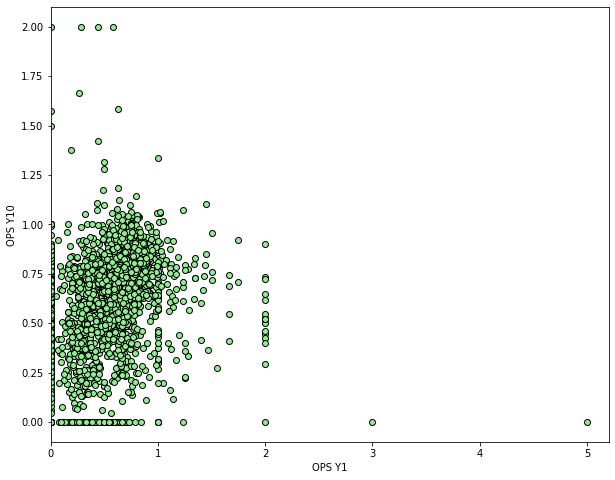

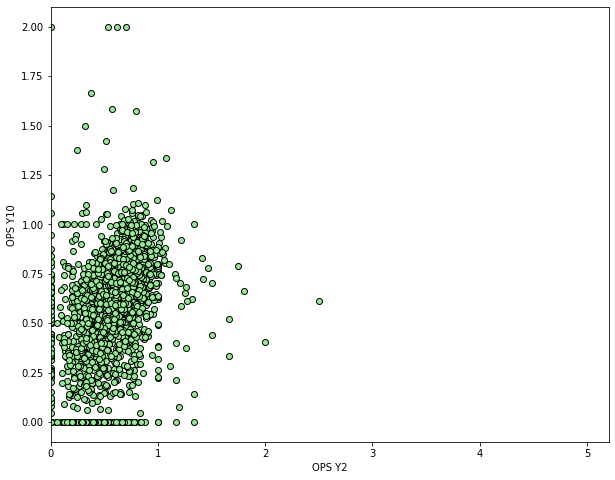

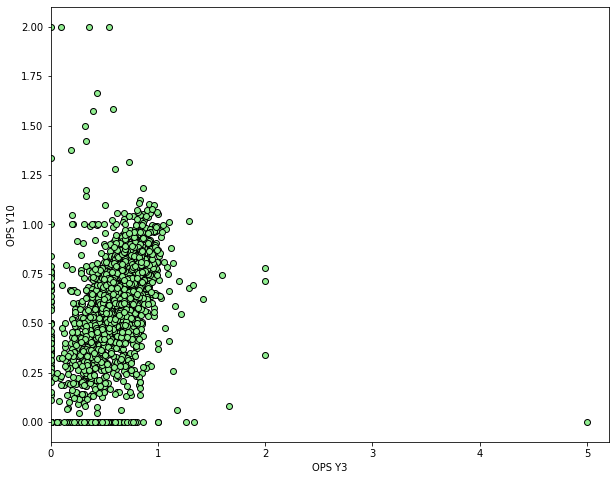

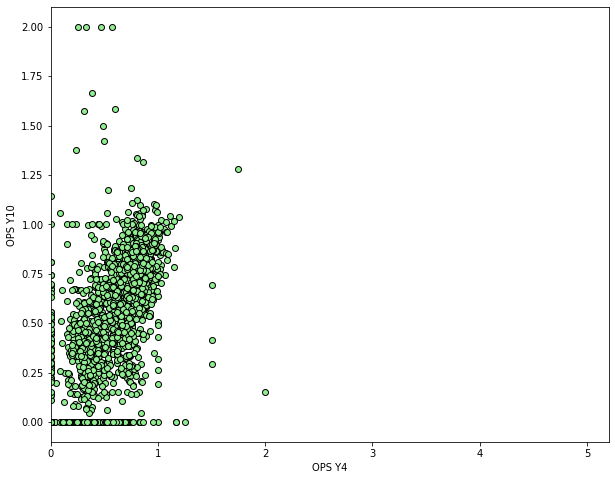

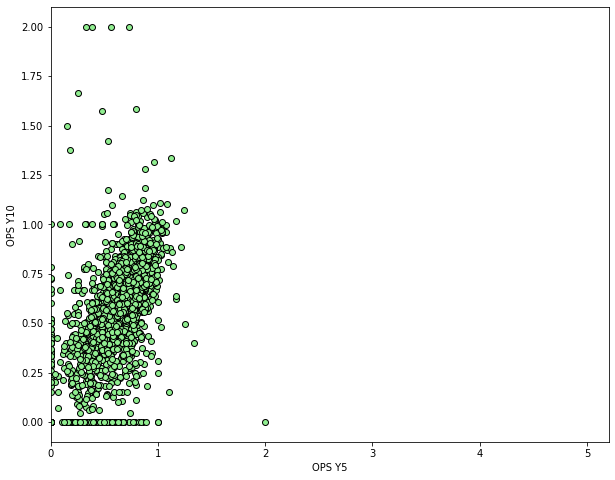

In [5]:
scatter_plot('OPS Y1', 'OPS Y10')
scatter_plot('OPS Y2', 'OPS Y10')
scatter_plot('OPS Y3', 'OPS Y10')
scatter_plot('OPS Y4', 'OPS Y10')
scatter_plot('OPS Y5', 'OPS Y10')

Here, we see a similar pattern with the OPS values from seasons closer to the tenth season seem to have more definition, however it isn't as tightly formed in the plots as with the sixth season.

Finally, we'll look for relationships with the overall career OPS of a player. (Keeping in mind that this represents a value for both completed and in-progress careers.)

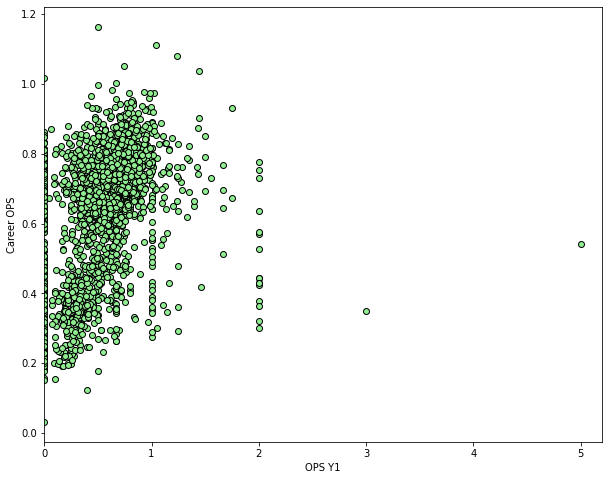

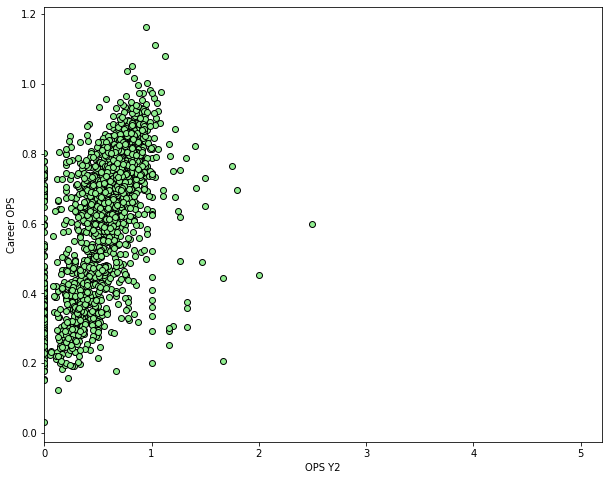

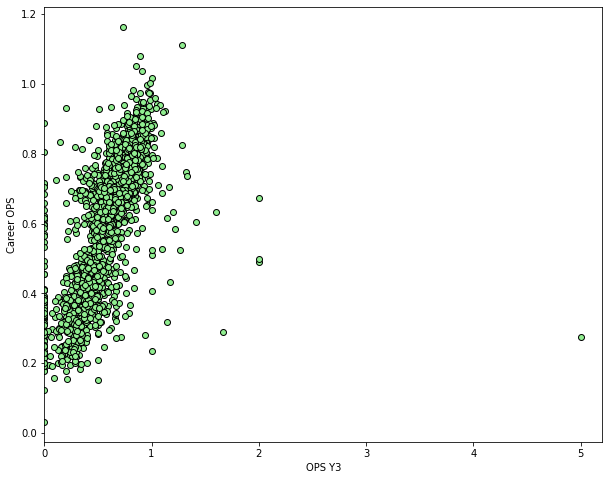

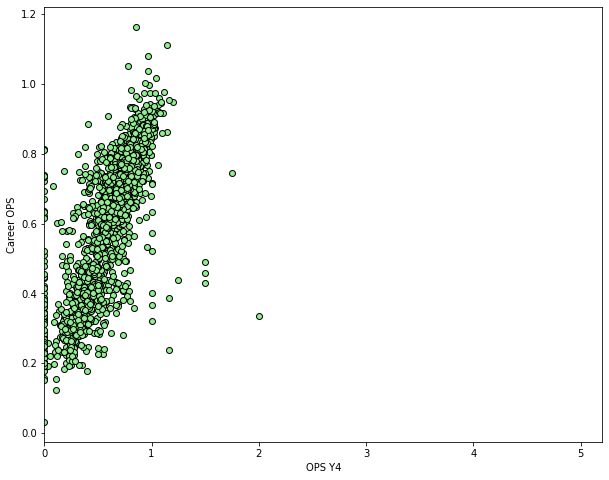

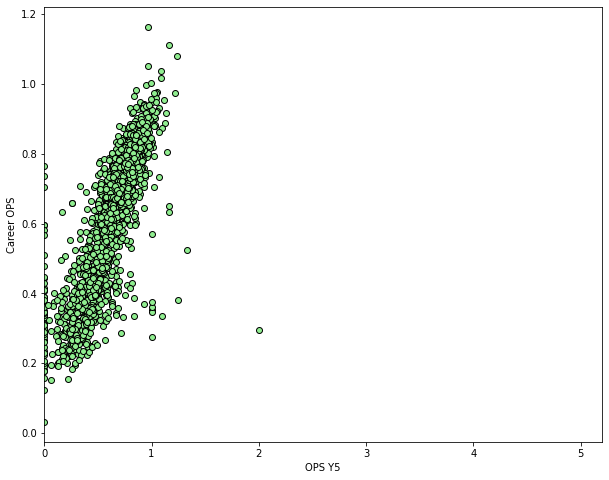

In [6]:
scatter_plot('OPS Y1', 'Career OPS')
scatter_plot('OPS Y2', 'Career OPS')
scatter_plot('OPS Y3', 'Career OPS')
scatter_plot('OPS Y4', 'Career OPS')
scatter_plot('OPS Y5', 'Career OPS')

We see much tigheter lines forming up for the career OPS values, especially for the third, fourth, and fifth sesaons, than we do for the others.

I'm surprised by these results. I anticipated the 6th season OPS and/or the 10th season OPS value to be more strongly correalated than the Career OPS, but it looks like Career OPS is more strongly related. I thought it would be stronger between consecutive seasons than this tends to indicate.

Let's build three models, both with the 3rd, 4th, and 5th season OPS values as features.

Model 1 (M1) will aim to predict the 6th season OPS.
Model 2 (M2) will aim to predict the 10th season OPS.
Model 3 (M3) will aim to predict the player's Career OPS.

Based on these plots, we might expect to see the most accuracy with M3. Let's try and see.

## Data Preparation

First, we'll build the dataframes, features, and targets we need. This will be used as X for all models.

In [7]:
X = all_data[['OPS Y3', 'OPS Y4', 'OPS Y5']]
X

,OPS Y3,OPS Y4,OPS Y5
0,0.923178,1.040538,0.931299
1,0.457391,2.000000,1.100000
2,0.905529,0.995070,0.969996
3,1.000000,0.719309,0.732600
4,0.759981,0.643968,0.774407
...,...,...,...
2394,0.787527,0.774207,0.888227
2395,0.889932,0.861508,0.847909
2396,0.000000,0.000000,0.285714
2397,0.844258,0.947596,0.698729


In [8]:
X = X.values
X

array([[0.92317778, 1.04053763, 0.93129924],
       [0.4573913 , 2.        , 1.1       ],
       [0.9055289 , 0.99506988, 0.96999592],
       ...,
       [0.        , 0.        , 0.28571429],
       [0.84425755, 0.94759645, 0.69872892],
       [0.8       , 0.66666667, 0.03703704]])

Next, we need three target array, which will be numbered to make the model they correspond with.

The target array for `'OPS Y6'` (Model 1) is `y1`.

In [9]:
y1 = all_data['OPS Y6']
y1 = y1.values
y1

array([1.03708445, 0.        , 0.93598292, ..., 0.        , 0.82206633,
       0.45705128])

The target array for `'OPS Y10'` (Model 2) is `y2`.

In [10]:
y2 = all_data['OPS Y10']
y2 = y2.values
y2

array([0.97712714, 0.15      , 0.87921859, ..., 0.25226244, 0.80855731,
       0.24285714])

The target array for `'Career OPS'` (Model 3) is `y3`.

In [11]:
y3 = all_data['Career OPS']
y3 = y3.values
y3

array([0.92942851, 0.33544974, 0.86974132, ..., 0.24815303, 0.78253169,
       0.36805467])

## Building Models

The following is a model evaluation function that will be used throughout the notebook.

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt

def print_model_evaluation(name, y, actual, predicted):
    
    mae = mean_absolute_error(actual, predicted)
    rmse = (np.sqrt(mean_squared_error(actual, predicted)))
    r2 = r2_score(actual, predicted)

    print("Model Performance\n")

    print('MAE\t= %.3f' % (mae))
    print('RMSE\t= %.3f' % (rmse))
    print('R^2\t= %.3f' % (r2))

    fig, ax = plt.subplots()
    ax.scatter(actual, predicted, edgecolors=(0, 0, 0))
    ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=1)
    title = "Measured vs. Predicted\n(" + name + ")"
    ax.set_title(title)
    ax.set_xlabel("Measured")
    ax.set_ylabel("Predicted")
    plt.show()

In [13]:
def store_r2(model_name, r2, results):
    results.append([model_name, r2])
    return results

### Model 1 (M1) - Predicting Y6

We'll split the data into three sets for this approach, training, validation, and testing.

Then, create our linear regression model using `'OPS Y3'`, `'OPS Y4'`, and `'OPS Y5'` to predict `'OPS Y6'`.

Model Performance

MAE	= 0.098
RMSE	= 0.144
R^2	= 0.589


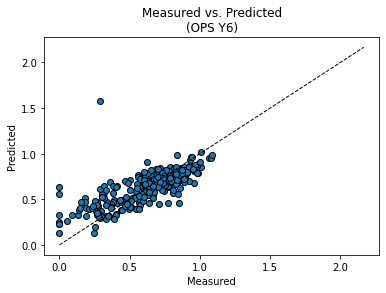

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size = 0.3, random_state = 42)
X_validate, X_test, y1_validate, y1_test = train_test_split(X_test, y1_test, test_size = 0.5, random_state = 42)

from sklearn.linear_model import LinearRegression

M1 = LinearRegression()
M1.fit(X_train, y1_train)

y1_predict_validate = M1.predict(X_validate)

print_model_evaluation('OPS Y6', y1, y1_validate, y1_predict_validate)

### Model 2 (M2) - Predicting Y10

We'll split the data into three sets for this approach, training, validation, and testing.

Then, create our linear regression model using `'OPS Y3'`, `'OPS Y4'`, and `'OPS Y5'` to predict `'OPS Y10'`.

Model Performance

MAE	= 0.144
RMSE	= 0.204
R^2	= 0.372


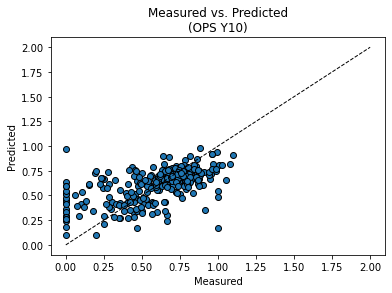

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size = 0.3, random_state = 42)
X_validate, X_test, y2_validate, y2_test = train_test_split(X_test, y2_test, test_size = 0.5, random_state = 42)

from sklearn.linear_model import LinearRegression

M2 = LinearRegression()
M2.fit(X_train, y2_train)

y2_predict_validate = M2.predict(X_validate)

print_model_evaluation('OPS Y10', y2, y2_validate, y2_predict_validate)

### Model 3 (M3) - Predicting Career OPS

We'll split the data into three sets for this approach, training, validation, and testing.

Then, create our linear regression model using `'OPS Y3'`, `'OPS Y4'`, and `'OPS Y5'` to predict `'Career OPS'`.

Model Performance

MAE	= 0.052
RMSE	= 0.089
R^2	= 0.771


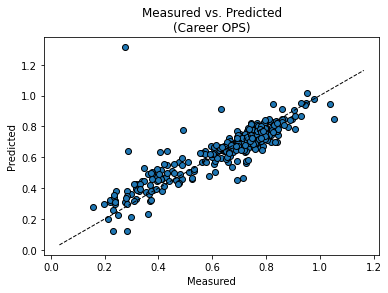

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y3_train, y3_test = train_test_split(X, y3, test_size = 0.3, random_state = 42)
X_validate, X_test, y3_validate, y3_test = train_test_split(X_test, y3_test, test_size = 0.5, random_state = 42)

from sklearn.linear_model import LinearRegression

M3 = LinearRegression()
M3.fit(X_train, y3_train)

y3_predict_validate = M3.predict(X_validate)

print_model_evaluation('Career OPS', y3, y3_validate, y3_predict_validate)

After observing the results of the initial three models, we can see a very strong linear correalation but also the strongest predictor is clear. For the remainder of this approach, we will continue to attempt to develop a model which will predict career batting success based on third, fourth, and fifth year OPS statistics.

## Improving M3 - Predicting Career OPS

Let's capture the R-Squared values for our M3 variants in `M3_results`, then try to improve on the M3 prediction approach.

In [17]:
M3_results = []
M3_results = store_r2("Lin Reg", r2_score(y3_validate, y3_predict_validate), M3_results)

### M3 - SGDRegressor

Looking first at a Stochastic Gradient Descent regressor, we'll run `GridSearchCV` first to see if we can locate any some helpful parameters for tuning, before training this variant of our model.

In [18]:
# Reference: https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor

tuned_parameters = [
    {"learning_rate": ["optimal"], "alpha": [0.1, 0.01, 1e-3, 1e-4], "max_iter": [2000]}
]

scores = ["neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"]

for score in scores:
    print("#### Tuning Hyper-Parameters for",score)
    print()

    clf = GridSearchCV(SGDRegressor(), tuned_parameters, scoring="%s" % score)
    clf.fit(X, y3)

    print("Best parameters on dataset (X):",clf.best_params_)
    print("\nGrid scores on dataset (X):")
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("\t%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print("\n\n")


#### Tuning Hyper-Parameters for neg_mean_absolute_error

Best parameters on dataset (X): {'alpha': 0.001, 'learning_rate': 'optimal', 'max_iter': 2000}

Grid scores on dataset (X):
	-0.081 (+/-0.021) for {'alpha': 0.1, 'learning_rate': 'optimal', 'max_iter': 2000}
	-0.371 (+/-0.131) for {'alpha': 0.01, 'learning_rate': 'optimal', 'max_iter': 2000}
	-0.051 (+/-0.003) for {'alpha': 0.001, 'learning_rate': 'optimal', 'max_iter': 2000}
	-0.068 (+/-0.032) for {'alpha': 0.0001, 'learning_rate': 'optimal', 'max_iter': 2000}



#### Tuning Hyper-Parameters for neg_root_mean_squared_error

Best parameters on dataset (X): {'alpha': 0.001, 'learning_rate': 'optimal', 'max_iter': 2000}

Grid scores on dataset (X):
	-0.109 (+/-0.006) for {'alpha': 0.1, 'learning_rate': 'optimal', 'max_iter': 2000}
	-0.529 (+/-0.413) for {'alpha': 0.01, 'learning_rate': 'optimal', 'max_iter': 2000}
	-0.079 (+/-0.011) for {'alpha': 0.001, 'learning_rate': 'optimal', 'max_iter': 2000}
	-0.091 (+/-0.021) for {'alpha':

Now, to use the identified parameters.

Model Performance

MAE	= 0.052
RMSE	= 0.087
R^2	= 0.779


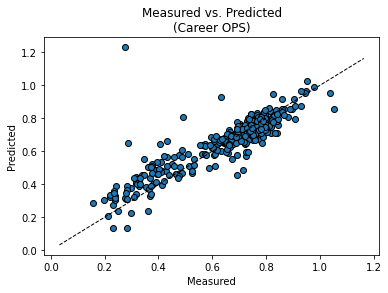

In [19]:
from sklearn.linear_model import SGDRegressor

M3_SDG = SGDRegressor(learning_rate='optimal', alpha=0.001, max_iter=2000)
M3_SDG.fit(X_train, y3_train)

y3_predict_validate = M3_SDG.predict(X_validate)

print_model_evaluation('Career OPS', y3, y3_validate, y3_predict_validate)

This isn't much different, but we'll add it to our results.

In [20]:
M3_results = store_r2("SDG Reg", r2_score(y3_validate, y3_predict_validate), M3_results)
M3_results

[['Lin Reg', 0.7713568208589414], ['SDG Reg', 0.7793350680966147]]

Let's try cross-validation:

In [21]:
from sklearn.model_selection import cross_validate

scores = cross_validate(M3_SDG, X, y3, cv=50, scoring='r2')
scores['test_score']

array([0.35949726, 0.84583662, 0.88970132, 0.87160526, 0.85262194,
       0.89020582, 0.87684383, 0.42339765, 0.87702111, 0.82891334,
       0.83656209, 0.90451076, 0.61414268, 0.79887818, 0.86893953,
       0.7868686 , 0.7961971 , 0.8153649 , 0.8215082 , 0.33002978,
       0.87557316, 0.78499528, 0.90904402, 0.83368868, 0.76736089,
       0.79593473, 0.82520716, 0.84560298, 0.65333787, 0.82524818,
       0.83128269, 0.89743136, 0.70747675, 0.64627772, 0.85015009,
       0.82324371, 0.76853652, 0.82278564, 0.83842044, 0.69045027,
       0.69856198, 0.75594331, 0.75440004, 0.82050757, 0.8472122 ,
       0.87080546, 0.76192897, 0.71694025, 0.89093793, 0.91893258])

In [22]:
np.mean(scores['test_score'])

0.7863372881125903

In [23]:
M3_results = store_r2("SDG +CV", np.mean(scores['test_score']), M3_results)

Not much different here either.

### M3 - Gradient Boosting

Next is Gradient Boosting. This one is a good candidate for improvements.

Model Performance

MAE	= 0.047
RMSE	= 0.070
R^2	= 0.858


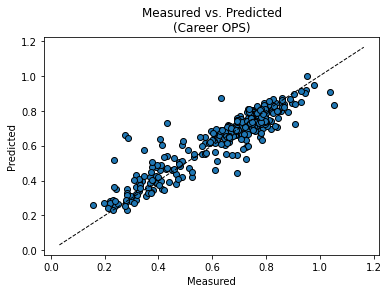

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

M3_GradBoost = GradientBoostingRegressor()
M3_GradBoost.fit(X_train, y3_train)

y3_predict_validate = M3_GradBoost.predict(X_validate)

print_model_evaluation('Career OPS', y3, y3_validate, y3_predict_validate)

The R-squared value has increased a little and the error values remain low.

In [25]:
M3_results = store_r2("GradBoost", r2_score(y3_validate, y3_predict_validate), M3_results)

Let's cross validate, as well.

In [26]:
from sklearn.model_selection import cross_validate

scores = cross_validate(M3_GradBoost, X, y3, cv=50, scoring='r2')
scores['test_score']

array([0.67125998, 0.89949686, 0.88663783, 0.92321195, 0.8610276 ,
       0.90489634, 0.92459006, 0.81164393, 0.89268563, 0.84611356,
       0.87583868, 0.92378013, 0.74706071, 0.90567201, 0.86937937,
       0.83459137, 0.87926973, 0.8871735 , 0.86381424, 0.86911732,
       0.90240887, 0.82377136, 0.9440374 , 0.78948569, 0.89265104,
       0.83631704, 0.86014008, 0.88043779, 0.86337682, 0.80370779,
       0.91954263, 0.91201266, 0.74406014, 0.75144454, 0.87299307,
       0.8924645 , 0.89801404, 0.86518336, 0.90841768, 0.7608723 ,
       0.81974781, 0.8308286 , 0.82589583, 0.87319485, 0.86671493,
       0.91640001, 0.75825931, 0.89757226, 0.90189128, 0.9108676 ])

In [27]:
np.mean(scores['test_score'])

0.8599994418304198

Not a big change, but a small increase.

In [28]:
M3_results = store_r2("GradBoost +CV", np.mean(scores['test_score']), M3_results)

### M5 - Grad Boost w/ K-Fold Validation

Returning to Gradient Boosting, we'll try with K-fold validation.

Model Performance

MAE	= 0.047
RMSE	= 0.070
R^2	= 0.859


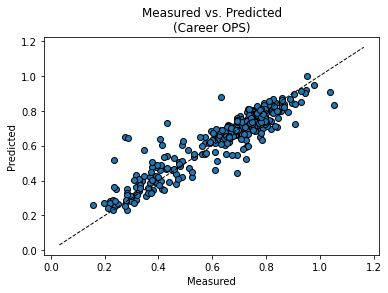

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

M3_GradBoost_K = GradientBoostingRegressor()
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)

n_scores = cross_val_score(M3_GradBoost_K, X_train, y3_train, scoring='r2', cv=10, n_jobs=-1, error_score='raise')

M3_GradBoost_K.fit(X_train, y3_train)

y3_predict_validate = M3_GradBoost_K.predict(X_validate)

print_model_evaluation('Career OPS', y3, y3_validate, y3_predict_validate)

About the same as without, which seems to be the trend with our very linear data.

In [30]:
M3_results = store_r2("GradBoost_K", r2_score(y3_validate, y3_predict_validate), M3_results)

And cross-validating,

In [31]:
from sklearn.model_selection import cross_validate

scores = cross_validate(M3_GradBoost_K, X, y3, cv=50, scoring='r2')
scores['test_score']

array([0.67125998, 0.89949686, 0.88663783, 0.92321195, 0.8610276 ,
       0.90489634, 0.92459006, 0.81409048, 0.89268563, 0.84611356,
       0.87583868, 0.92378013, 0.74706071, 0.90567201, 0.86941465,
       0.82367157, 0.87926973, 0.88582315, 0.86381424, 0.87853221,
       0.90240887, 0.82377136, 0.9440374 , 0.78948569, 0.89271749,
       0.83631704, 0.86339864, 0.88043779, 0.86337682, 0.80370779,
       0.91954263, 0.91201266, 0.74406014, 0.75144454, 0.87299307,
       0.8924645 , 0.89801404, 0.86518336, 0.90841768, 0.75975723,
       0.81974781, 0.8308286 , 0.82589583, 0.87319485, 0.86725896,
       0.91640001, 0.75796071, 0.89984405, 0.90189128, 0.9108676 ])

In [32]:
np.mean(scores['test_score'])

0.8600865155831504

Very much in the same vein once again.

In [33]:
M3_results = store_r2("GradBoostK +CV", np.mean(scores['test_score']), M3_results)

### M3 - SVR with GridSearchCV results

Looking in a different direction with a Support Vector Machine, but first using `GridSearchCV`.

In [34]:
# Reference: https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
]

scores = ["neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"]

for score in scores:
    print("#### Tuning Hyper-Parameters for",score)
    print()

    clf = GridSearchCV(SVR(), tuned_parameters, scoring="%s" % score)
    clf.fit(X, y3)

    print("Best parameters on dataset (X):",clf.best_params_)
    print("\nGrid scores on dataset (X):")
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("\t%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print("\n\n")


#### Tuning Hyper-Parameters for neg_mean_absolute_error

Best parameters on dataset (X): {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on dataset (X):
	-0.077 (+/-0.003) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
	-0.122 (+/-0.004) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
	-0.055 (+/-0.003) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
	-0.077 (+/-0.003) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
	-0.051 (+/-0.003) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
	-0.055 (+/-0.003) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
	-0.051 (+/-0.003) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
	-0.051 (+/-0.003) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
	-0.051 (+/-0.003) for {'C': 1, 'kernel': 'linear'}
	-0.051 (+/-0.003) for {'C': 10, 'kernel': 'linear'}
	-0.051 (+/-0.003) for {'C': 100, 'kernel': 'linear'}
	-0.051 (+/-0.003) for {'C': 1000, 'kernel': 'linear'}



#### Tuning Hyper-Parameters for neg_root_mean_squared_error

Best parameters on da

And then using the 'best' parameters identified in our search.

Model Performance

MAE	= 0.052
RMSE	= 0.079
R^2	= 0.818


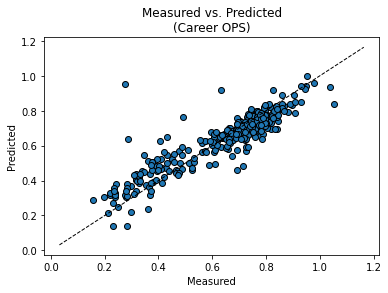

In [35]:
from sklearn.svm import SVR

M3_SVR_Grid = SVR(kernel='rbf', gamma=0.001, C=1000)
M3_SVR_Grid.fit(X_train, y3_train)

y3_predict_validate = M3_SVR_Grid.predict(X_validate)

print_model_evaluation('Career OPS', y3, y3_validate, y3_predict_validate)

These results are higher than most so far, but not better than GradientBoosting.

In [36]:
M3_results = store_r2("SVR_Grid", r2_score(y3_validate, y3_predict_validate), M3_results)

Cross-validating...

In [37]:
from sklearn.model_selection import cross_validate

scores = cross_validate(M3_SVR_Grid, X, y3, cv=50, scoring='r2')
scores['test_score']

array([0.44159309, 0.84755012, 0.88247988, 0.90953752, 0.86014453,
       0.8700544 , 0.89590174, 0.42654739, 0.87852933, 0.82288044,
       0.84023083, 0.9044422 , 0.67751436, 0.87248356, 0.87302636,
       0.80900073, 0.8146996 , 0.8199778 , 0.80804855, 0.73270483,
       0.88055114, 0.83397886, 0.90953122, 0.82795479, 0.81285706,
       0.80017613, 0.82965075, 0.85389187, 0.80934285, 0.82715799,
       0.85716388, 0.89474563, 0.70358966, 0.66639596, 0.85151778,
       0.83417371, 0.7884621 , 0.84246201, 0.89279951, 0.70062485,
       0.76572956, 0.77627847, 0.7680041 , 0.8123892 , 0.85750565,
       0.86730398, 0.76190406, 0.83386404, 0.90365346, 0.92420168])

In [38]:
np.mean(scores['test_score'])

0.8135041846434556

And, once again, no big changes here.

In [39]:
M3_results = store_r2("SVR_Grid +CV", np.mean(scores['test_score']), M3_results)

### Summary of M3 variants

To recap, here are the models and also the mean R-squared value after cross validating (+CV).

In [40]:
for row in M3_results:
    print(row[0],"\tR^2 = ",row[1])

Lin Reg 	R^2 =  0.7713568208589414
SDG Reg 	R^2 =  0.7793350680966147
SDG +CV 	R^2 =  0.7863372881125903
GradBoost 	R^2 =  0.8579055826166555
GradBoost +CV 	R^2 =  0.8599994418304198
GradBoost_K 	R^2 =  0.8586657051574745
GradBoostK +CV 	R^2 =  0.8600865155831504
SVR_Grid 	R^2 =  0.8180689977982774
SVR_Grid +CV 	R^2 =  0.8135041846434556


The GradientBoosting regressors provided the most, albeit marginal, improvement to our models and the R-squared value.

## Model Evaluation with Test Data

Now that we have some models with somewhat improved R-scores, we can make use of the `y3_test` data that was split up to evaluate the models with totally unseen data.

GradBoosting and GradBoosting with KFold validation are pretty close, so we'll take a quick look at both.

### M3 using GradBoost

Model Performance

MAE	= 0.046
RMSE	= 0.064
R^2	= 0.852


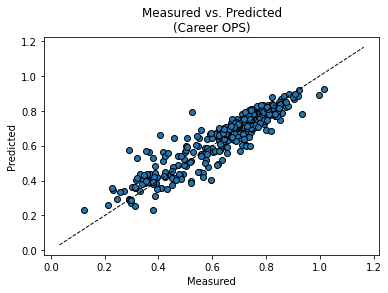

In [41]:
y3_predict_test = M3_GradBoost.predict(X_test)

print_model_evaluation('Career OPS', y3, y3_test, y3_predict_test)

Model Performance

MAE	= 0.046
RMSE	= 0.064
R^2	= 0.853


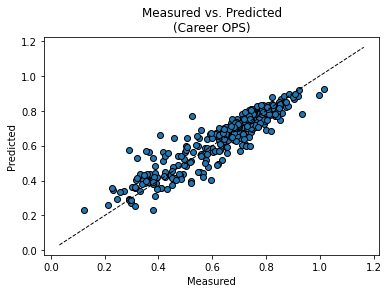

In [42]:
y3_predict_test = M3_GradBoost_K.predict(X_test)

print_model_evaluation('Career OPS', y3, y3_test, y3_predict_test)

Again, these results remain pretty similar to one another and also, although slightly lower than our validation scores, is still relatively close to what we saw earlier. There isn't much variance, which is good.

## Model Evaluation Based on Context

How good is our selected model at correctly identifying _**above average**_ hitters, or better? If we consider the measure mentioned in the introduction, then one thought is looking at if the model is _generally_ good at identifying if a player is above average, or better.

So, in this case, the question becomes less about what the specific value of the OPS is and more about if the player is predicted correctly as being above average (based on predicted Career OPS) or not.

This last function is a test looking for the number of accurately classified players, in this general sense. For example, if a batter's predicted OPS is above average but their actual OPS is below average, then this would not be considered a correct prediction.

In [43]:
def general_classification_accuracy(actual, prediction):
    if len(actual) == len(prediction):
        i = 0
        correct_classifications = 0
        
        while i < len(actual):
            actual_ops = actual[i]
            predicted_ops = prediction[i]

            if ((actual_ops > 0.7666) and (predicted_ops > 0.7666)) or \
                ((actual_ops <= 0.7666) and (predicted_ops <= 0.7666)):
                correct_classifications += 1
                
            i+=1
                
    return correct_classifications/(len(actual)*1.0)


general_classification_accuracy(y3_test, y3_predict_test)

0.9111111111111111

What this metric shows us is that the model correctly identifies players as either above or below average 91.1% of the time.

While it isn't a deeply meaningful metric, it is worth examining since it both confirms the model as _generally_ accurate model for this problem. Generally speaking, this appears to be an adequate model, albeit a very naive one in the larger world of baseball data and sabermetrics.

## Comparison of the Hall of Fame Approach and the OPS Approach

The OPS Approach is generally a good indicator of future batting success over a player's career, but not a stellar one. It is definitely more reliable than the Hall of Fame Approach for predicting batting success and is far more tangible in nature.

The challenge with the Hall of Fame Approach is the very complicated world of selection and voting and things not on paper, statistically speaking, that play into whether or not a player is inducted. While at first thought it seemed like a valuable approach (after all, there aren't too many mediocre batters in the Hall of Fame) it was thoroughly flawed and not generally helpful for predicting those who will have moderate batting success throughout their careers but will not end up as Hall of Fame superstars.

The surprise with the OPS Approach was how the strongest approach was to predict the Career OPS and not an OPS for a season that was more near-term in the future. The challenge with this approach is likely that of the many additional dynamics of play that it does not account for, even with respect to batting. For instance, a player may not have a high OPS but still be a very effective batter that contributes well to the team. This model would not be able to predict those player's successes at the plate because we were examining too specific of a measure. However, overall, this is a valuable, albeit imperfect, statistic for general use.